## Dimension reduction for data visualization

Non-linear dimension reductiona and clustering is a powerful tool to very fastly see where are the most significant differences between different spectra and what is driving these differences. 
We propose here to use UMAP as a dimension reduction algorithm and plot the 2D representation for different scenarios.

In [118]:
!pip install umap-learn

In [99]:
import umap
import pandas as pd
import seaborn as sns

In [100]:
# Select for both stations the maximum frequency
ds1 = pypam.utils.select_frequency_range(ds_collection_resampled['NRS11'], 
                                   min_freq=min_freq, 
                                   max_freq=2000, freq_coord='frequency')
ds2 = pypam.utils.select_frequency_range(ds_collection_resampled['MARS'], 
                                   min_freq=min_freq, 
                                   max_freq=2000, freq_coord='frequency')

We first need to convert the data from xarray to pandas format, as this is what UMAP algorithm takes as an input

In [101]:
df1 = ds1['psd'].to_pandas()
frequency_columns = df1.columns
df1['station'] = 'NRS11'

df2 = ds2['psd'].to_pandas()
df2.columns = frequency_columns
df2['station'] = 'MARS'

df = pd.concat([df1, df2])

In [113]:
df['embedding'] = df[frequency_columns].values.tolist()
df['month'] = df.index.month 
df['hour'] = df.index.hour
df.to_pickle('df_example_soundcoop.pkl')


In [102]:
df = df.dropna()
df1 = df1.dropna()
df2 = df2.dropna()

Then we perform the dimension reduction

<div class="alert alert-block alert-info">
⚠️ Be patient, this can take a while it lots of data are processed...
</div>

In [103]:
umap_box = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.05)
umap_box.fit(df[frequency_columns].values)
embedding = umap_box.transform(df[frequency_columns])

We plot the results, coloring per station

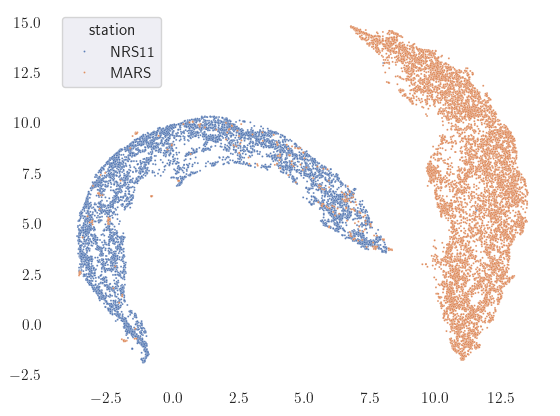

In [104]:
ax = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],
                     s=2, alpha=0.9, hue=df['station'],
                     legend=True)
ax.set_facecolor('white')
plt.show()

We can perfom another dimension reduction, this time only for one station 

In [106]:
umap_box = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.05)
umap_box.fit(df1[frequency_columns].values)
embedding = umap_box.transform(df1[frequency_columns])

And we can plot it coloring it by hour for example

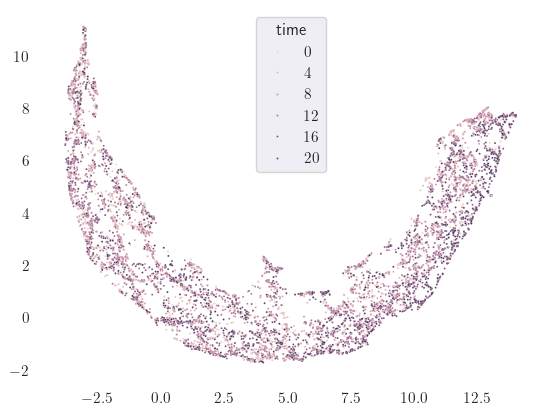

In [107]:
ax = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],
                     s=2, alpha=0.9, hue=df1.index.hour,
                     legend=True)
ax.set_facecolor('white')
plt.show()

Or by month

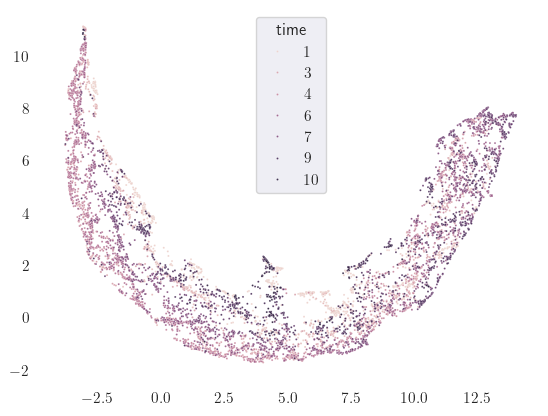

In [108]:
ax = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],
                     s=2, alpha=0.9, hue=df1.index.month,
                     legend=True)
ax.set_facecolor('white')
plt.show()

In [115]:
umap_box = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.05)
umap_box.fit(df2[frequency_columns].values, y=df2.index.month)
embedding = umap_box.transform(df2[frequency_columns])

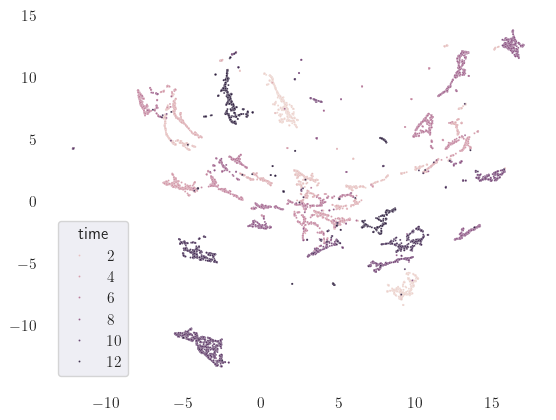

In [116]:
ax = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],
                     s=2, alpha=0.9, hue=df2.index.month,
                     legend=True)
ax.set_facecolor('white')
plt.show()